# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para lograr una adecuada descripción de los datos, el primer paso es importar las librerias necesirias, para esta tarea unicamente requeriremos de pandas, después, procederemos a leer los archivos de datos mediante la funcion pd.read_csv de pandas, luego mostraremos la información de cada uno de los archivos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products = pd.read_csv('/datasets/products.csv',sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
# mostrar información del DataFrame
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

El primer error detectado fue el delimitador de columnas, el cual es ";" y no "," como usualmente, por lo que procedimos a indicar cual es el indicador con "sep=;", como 'order_products.csv' contiene muchas filas de datos, incluimos 'show_counts=True' para imprimir los recuentos no nulos. Podemos concluír preliminarmente que los DataFrames 'instacart_orders',  'products' y 'order_products' contienen valores ausentes.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

El primer paso es verificar qué tipo de datos tiene cada columna y qué información requiero. Una vez determinado esto, procedo a cambiar el tipo de datos en caso de ser necesario. Se identifican y/o eliminan los valores duplicados. Luego procedo a analizar qué valores asigno a los valores ausentes o los dejo como estan, o en su caso, los elimino.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
no_duplicados_orders = orders.duplicated().sum()
duplicados_orders = orders[orders.duplicated()]
print(no_duplicados_orders)
print(duplicados_orders)


15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si tiene lineas duplicadas pero unicamente en el día de la semana y la hora en la que se realizó el pedido, sin embargo tienen id_order diferente por lo que se concluye que fue un pedido distinto, al momento, conservé los duplicados porque representan datos válidos de distintos usuarios en el mismo horario.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_wed_2 = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print(pedidos_wed_2)
print(f"Total de pedidos el miércoles a las 2:00 a.m.: {len(pedidos_wed_2)}")


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Sugiere que comparte características con las 15 filas duplicadas que se analizaron previamente, por lo que aquellas 15 filas duplicadas se pueden eliminar.

In [10]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders.duplicated(subset='order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Al buscar filas duplicadas al principio, resultaron 15, al analizarlas me percaté que, aparentemente, solo se duplicaban en el día y la hora del pedido, miercoles a las 2 am, sin embargo, resultó que no eran los únicos pedidos a esa hora y no todos los mostraba como duplicados por lo que procedí a eliminar esas filas duplicadas.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
no_duplicados_products = products.duplicated().sum()
duplicados_products = products.describe()
print(no_duplicados_products)
print(duplicados_products)


0
         product_id      aisle_id  department_id
count  49694.000000  49694.000000   49694.000000
mean   24847.500000     67.773192      11.728478
std    14345.566475     38.317265       5.850314
min        1.000000      1.000000       1.000000
25%    12424.250000     35.000000       7.000000
50%    24847.500000     69.000000      13.000000
75%    37270.750000    100.000000      17.000000
max    49694.000000    134.000000      21.000000


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
products.duplicated(subset='department_id').sum()

49673

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(products.duplicated(subset='product_name').sum())
print(products[products.duplicated(subset='product_name')])

products['product_name'] = products['product_name'].str.upper()


1257
       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]


In [16]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [17]:
products['product_name'].duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
# Filtrar productos cuyo nombre no sean ausentes
productos_con_nombre = products[products['product_name'].notna()]

# Revisar si hay nombres duplicados en el subconjunto
duplicados_products = productos_con_nombre.duplicated(subset='product_name').sum()

print(f"Número de productos duplicados: {duplicados_products}")
print(productos_con_nombre.sort_values(by='department_id').head(5))

Número de productos duplicados: 104
       product_id                             product_name  aisle_id  \
49693       49694                  BURRITO- STEAK & CHEESE        38   
3913         3914                  MEATBALLS ITALIAN STYLE        38   
26492       26493      CLASSIC VEGETABLES CHOPPED BROCCOLI       116   
13377       13378                      STIR FRY VEGETABLES       116   
13374       13375  VITAMINWATER ZERO FOCUS KIWI-STRAWBERRY        37   

       department_id  
49693              1  
3913               1  
26492              1  
13377              1  
13374              1  


In [19]:
# Revisa si hay nombres duplicados diferentes de productos no faltantes
# Filtrar productos cuyo nombre sea 'BURRITO- STEAK & CHEESE'
productos_con_burrito = products[products['product_name'] == 'BURRITO- STEAK & CHEESE']

# Revisar si hay nombres duplicados en el subconjunto
duplicados_products_b = productos_con_burrito.duplicated(subset='product_name').sum()

print(f"Número de nombres con burritos duplicados: {duplicados_products_b}")
print(productos_con_burrito.sort_values(by='department_id').head(20))

Número de nombres con burritos duplicados: 1
       product_id             product_name  aisle_id  department_id
44314       44315  BURRITO- STEAK & CHEESE        38              1
49693       49694  BURRITO- STEAK & CHEESE        38              1


In [20]:
# Eliminar duplicados que no sean ausentes
products['product_name'] = products['product_name'] != 



Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se detectaron filas duplicadas diferentes a valores ausentes por lo que se procedió a eliminarlas.

In [21]:
# Comprobacion
# Revisa si hay nombres duplicados diferentes de productos no faltantes
# Filtrar productos cuyo nombre sea 'BURRITO- STEAK & CHEESE'
productos_con_burrito = products[products['product_name'] == 'BURRITO- STEAK & CHEESE']

# Revisar si hay nombres duplicados en el subconjunto
duplicados_products_b = productos_con_burrito.duplicated(subset='product_name').sum()

print(f"Número de nombres con burritos duplicados: {duplicados_products_b}")
print(productos_con_burrito.sort_values(by='department_id').head(20))

Número de nombres con burritos duplicados: 1
       product_id             product_name  aisle_id  department_id
44314       44315  BURRITO- STEAK & CHEESE        38              1
49693       49694  BURRITO- STEAK & CHEESE        38              1


### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments.duplicated(subset='department_id').sum())
print(departments.duplicated(subset='department').sum())

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se detectaron filas duplicadas en general o por columna por lo que se dejo tal y como estaba.

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [25]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles.duplicated(subset='aisle_id').sum())
print(aisles.duplicated(subset='aisle').sum())

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se detectaron filas duplicadas en general o por columna por lo que se dejo tal y como estaba.

### `order_products` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(order_products.duplicated(subset='order_id').sum())
print(order_products.duplicated(subset='product_id').sum())
print(order_products.duplicated(subset='add_to_cart_order').sum())
print(order_products.duplicated(subset='reordered').sum())

print(order_products.head(30).sort_values('order_id'))

4094961
4499434
4544942
4545005
    order_id  product_id  add_to_cart_order  reordered
11     44064       22963               28.0          0
18     89640       46692                7.0          0
9     420019       23315                4.0          1
3     491251        8670               35.0          1
12    522547       40571               10.0          1
1     567889        1560                1.0          1
26    623027       13176                3.0          1
16    639939       10017                1.0          1
6     644579       12341                5.0          1
23    750040        8518                1.0          0
29    773308       37029               15.0          0
10    925051        9421                2.0          1
25   1046178       26620                2.0          0
22   1482958       45603                6.0          1
20   1687771       22963                5.0          1
17   1721072       24561                8.0          1
14   1961225       37553         

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dada la naturaleza del DataFrame, es normal que haya valores duplicados en las columnas individualmente, pero al no haber valores duplicados en filas completas, no veo error alguno.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
# Contabilizar valores ausentes
print(products.isna().sum())

# Mostrar las filas donde 'product_name' tiene valores ausentes
print(products[products['product_name'].isna()])

# Mostrar las primeras 10 filas donde 'aisle_id' sea igual a 100
print(products[products['aisle_id'] == 100].head(10))

# Agrupar para analizar
missing_products_grouped = products[products['product_name'].isna()].groupby(['aisle_id', 'department_id'])
print(missing_products_grouped.size())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100  

In [29]:
# Reemplazar valores NaN por Unknown
products['product_name'] = products['product_name'].fillna('Unknown')

# Verificar que no haya valores nulos
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Para el DataFrame 'products' el cual presentaba valores ausentes en 'pruduct_name' tome la desición de cambiar los valores ausentes por 'Unknown', ya que si tienen id de producto por lo que creo conveniente conservar los valores. Todos estos valores estan relacionados con el pasillo con id 100 y con el departamento 21. Agrupé estas dos columnas para comprobarlo.

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
# Contabilizar valores ausentes
print(orders.isna().sum())
# Mostrar los valores ausentes
print(orders[orders['days_since_prior_order'].isna()])
# Mostrar las primeras 30 filas para analizar la clase de datos
print(orders.head(30))

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4               

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para el DataFrame 'orders' se encontraron valores ausentes en 'days_since_prior_order', despues de analizar la columna tomé la decisión de cambiar estos valores ausentes por 0 y cambiar el tipo de datos por números enteros. Inferí que podría ser 0 ya que este valor no estaba presente en la columna, además intuí que se relacionaba con clientes que estaban teniendo su primera compra.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes

# Contabilizar valores ausentes
print(order_products.isna().sum())

# Mostrar los valores ausentes
print(order_products[order_products['add_to_cart_order'].isna()])

# Mostrar las primeras filas de una orden, ordenando la forma en que se agregó el producto para analizar la clase de datos
print(order_products[order_products['order_id']==491251].describe())

# Mostrar las primeras filas de una orden con valor ausente, ordenando la forma en que se agregó el producto para analizar la clase de datos
print(order_products[order_products['order_id']==1959075].head(30).sort_values(by='add_to_cart_order'))


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
       order_id    product_id  add_to_cart_order  reordered
count      42.0     42.000000          42.000000  42.000000
mean   491251.0  25717.

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products_nan = order_products[order_products['add_to_cart_order'].isna()]
print(order_products_nan.head(10).sort_values(by='order_id'))

       order_id  product_id  add_to_cart_order  reordered
57981     61355        5322                NaN          0
62655    264710       40281                NaN          0
34183    844733       32717                NaN          0
58228    936852       31373                NaN          1
16418   1717990        4142                NaN          0
64336   1717990       39408                NaN          0
30114   1959075       42828                NaN          1
9926    1968313       43867                NaN          0
737     2449164        5068                NaN          0
14394   2926893       11688                NaN          0


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# No
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
order_id_grouped = order_products[order_products['add_to_cart_order'].isna()].groupby(['order_id','product_id'])
print(order_id_grouped.size().sort_values())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


order_id  product_id
9310      25753         1
1959075   45842         1
          47740         1
1961723   3849          1
          7926          1
                       ..
936852    14833         1
          15438         1
          18362         1
1038146   42110         1
3383594   49144         1
Length: 836, dtype: int64


Describe brevemente cuáles son tus hallazgos.
Cada pedido tiene diferente cantidad de productos.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.
# Reemplazar valores NaN por 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# Verificar que no haya valores nulos
print(order_products.isna().sum())

# Convertir la columna a tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Mostrar las primeras 30 filas
print(order_products.head(10))

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
5   2456893       21616                  4          1
6    644579       12341                  5          1
7   2231852       44925                 10          1
8   3185766       36259                 14          1
9    420019       23315                  4          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para el DataFrame 'order_products' se encontraron valores ausentes en 'add_to_cart_order', despues de analizar la columna tomé la decisión de cambiar estos valores ausentes por 999, según las indicaciones, y cambiar el tipo de datos por números enteros. Este parece ser un error al cargar el producto al carrito.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se logró limpiar los DataFrames con éxito, analizando paso a paso cada aspecto relevante entre datos ausentes y valores duplicados.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(orders['order_hour_of_day'].min())
print(orders['order_hour_of_day'].max())

0
23


In [37]:
print(orders['order_dow'].min())
print(orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones

Los valores de las columnas en cuestión son razonables.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [38]:
%matplotlib inline

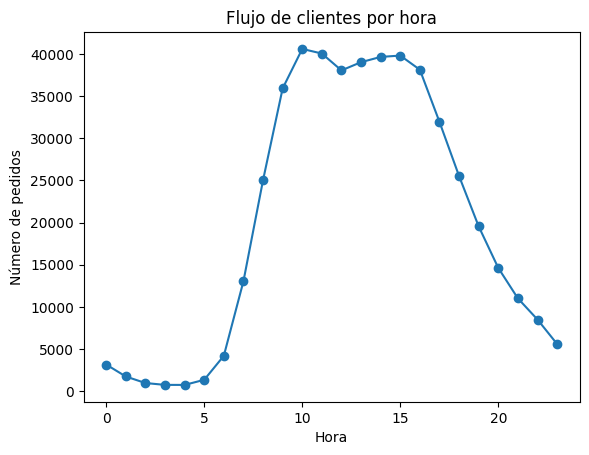

In [39]:
from matplotlib import pyplot as plt

# Agrupar los datos por 'order_hour_of_day' y contar el número de pedidos de 'order_id'
orders_by_hour = orders.groupby('order_hour_of_day')['order_id'].count()

# Graficar los datos
orders_by_hour.plot(
    kind='line',
    marker='o',
    title='Flujo de clientes por hora',
    xlabel='Hora',
    ylabel='Número de pedidos',
    legend=False,
)

# Mostrar la gráfica
plt.show()


Escribe aquí tus conclusiones

Observando la gráfica podemos concluir que entre las 10 y las 16 horas el flujo de pedidos es mayor, teniendo su pico más alto a las 10, y entre las 1 y las 5 el flujo es menor.

### [A3] ¿Qué día de la semana compran víveres las personas?

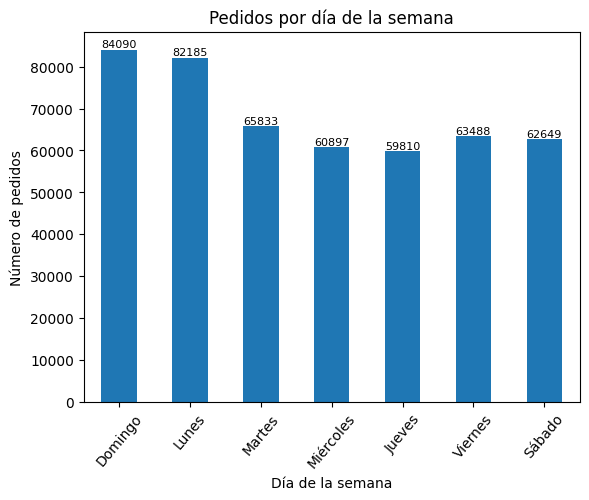

In [40]:
# Agrupar los datos por 'order_dow' y contar el número de pedidos usando 'order_id'
orders_by_day = orders.groupby('order_dow')['order_id'].count()

# Graficar los datos con puntos
orders_by_day.plot(
    kind='bar',
    title='Pedidos por día de la semana',
    xlabel='Día de la semana',
    ylabel='Número de pedidos',
    legend=False,
    rot=50
)

# Agregar etiquetas a cada barra
for dow, num_orders in orders_by_day.items():
    plt.text(dow, num_orders, str(num_orders), ha='center', va='bottom', fontsize=8)

# Ajustar el eje x para que muestre los días de la semana con más claridad
plt.xticks(ticks=range(7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])

# Mostrar la gráfica
plt.show()

Escribe aquí tus conclusiones

Domingo y lunes, respectivamente, son los días en los que más gente realiza sus compras, el jueves es el día en que menos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [41]:
orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

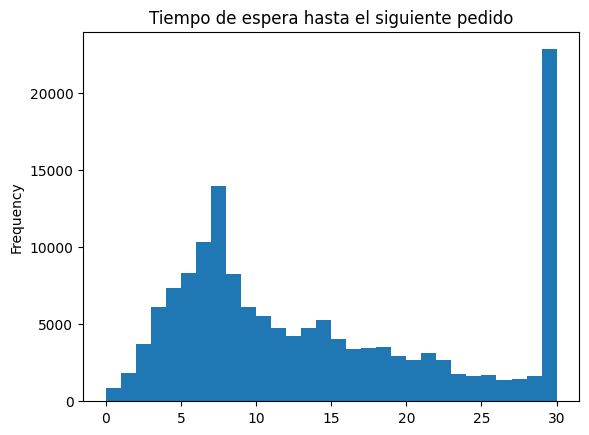

In [42]:
# Agrupar los datos por 'days_since_prior_order' y contar el número de pedidos
orders_by_days = orders.groupby('user_id')['days_since_prior_order'].median()
#orders_by_days.plot(kind='hist')
 #Graficar los datos
orders_by_days.plot(
    kind='hist',
    title='Tiempo de espera hasta el siguiente pedido',
    xlabel='Días desde el pedido anterior',
    ylabel='Número de pedidos',
    legend=False,
    bins=30
)

# Mostrar la gráfica
plt.show()

Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

### Conclusion general del proyecto: